## The goal is to study the various a triforce maps

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf
import pandas as pd
import glob2
import os
from itertools import product
import numpy as np
#import seaborn as sns

%matplotlib notebook
#%matplotlib

from tboard import file2number
from vis_utils import split_posneg,get_path
from vis_utils import get_neuron_values
from nonlinearities import sigmoid
from vis_utils import splitL

clist=['g','c','m','y','k','b','r']
listLineStyle=['solid', 'dashed', 'dashdot', 'dotted']

In [3]:
from vis_utils import (split_posneg , get_path, get_np_network,
                        get_neuron_values, splitL, load_weights,
                        resample_grid,vec_get_neuron_values,
                        get_del_weights  )
from calc_maps import (get_net_states,rescale_weights,compose_affine)

In [4]:
log_dir='./logs/Model_0220_102206_triforce_mac_test'

In [5]:
record_dir=os.path.join(log_dir,'records')
id_str=str(file2number(log_dir))
all_weights=load_weights(log_dir)
all_step=np.load(get_path('step','wwatch',log_dir))
dt=10
weights=[[w[::dt],b[::dt]] for w,b in all_weights]
arch=[b.shape[-1] for w,b in weights[:-1]]#net architecture
del_weights=get_del_weights(weights)
step=all_step[::dt]
del_weights=get_del_weights(weights)
gridX=np.load(get_path('gridX','hmwatch',log_dir))
GridX=resample_grid(gridX)
npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)


In [6]:
W_weights,b_weights=zip(*del_weights)
W1,W2,W3,W4=W_weights
b1,b2,b3,b4=b_weights
W1f,W2f,W3f,W4f=W1[-1],W2[-1],W3[-1],W4[-1]#final weights
b1f,b2f,b3f,b4f=b1[-1],b2[-1],b3[-1],b4[-1]#final weights
#delW4f=np.reshape(W4[-1,:,1]-W4[-1,:,0], [-1,1])
#delb4f=b4[-1,1]-b4[-1,0]


In [7]:
time=-1
time_weights=[[w[time],b[time]] for w,b in del_weights]
Sig,Centers,Cnts=get_net_states(GridX,time_weights)
sigl=np.split(Sig,np.cumsum(arch)[:-1],axis=-1)
new_weights=rescale_weights(time_weights,sigl)
Linear,Bias=compose_affine(new_weights)
M=np.concatenate([Linear,np.expand_dims(Bias,-1)],axis=-2)#idx,xdim+1,1
cnt_thresh=np.percentile(Cnts,20)
ix_thresh=np.where( Cnts>=cnt_thresh )[0]
M2=M/np.linalg.norm(M,ord=2,axis=(-2,-1),keepdims=True)
M2=np.squeeze(M2)
#M2=M/M.sum(axis=1,keepdims=True)

#print np.around(M2[ix_thresh],2)
#print np.around(np.concatenate([ M2[ix_thresh], np.expand_dims(Cnts[ix_thresh],-1) ],axis=-1),2)


In [8]:
Sig.shape

(49, 12)

In [9]:
sigl[0].shape

(49, 4)

In [10]:
arch

[4, 4, 4]

In [27]:
new_weights[-1][0].shape

(4, 1)

In [29]:
compose_affine([[W3f,b3f],[W4f,b4f]])

(array([[-0.02578483],
        [ 5.949548  ],
        [ 8.661054  ],
        [-2.9681802 ]], dtype=float32), array([-5.7837358], dtype=float32))

In [30]:
len(sigl)

3

In [44]:
L34_weights=[[W3f,b3f],[W4f,b4f]]
L34_sig=np.unique(sigl[-1],axis=0)
L34_pth_weights=rescale_weights(L34_weights,[L34_sig])
L34_Linear,L34_Bias=compose_affine(L34_pth_weights)
L34_M=np.concatenate([L34_Linear,np.expand_dims(L34_Bias,-1)],axis=-2)


In [45]:
L34_sig

array([[1, 0, 0, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 0],
       [1, 1, 1, 0]])

In [46]:
L34_Linear[0]

array([[-0.03932296],
       [ 1.50727207],
       [ 1.80289811],
       [ 1.75385132]])

In [47]:
L34_pth_weights[0]

[array([[[-2.09904891e-02,  0.00000000e+00, -0.00000000e+00,
          -0.00000000e+00],
         [ 8.04577708e-01, -0.00000000e+00, -0.00000000e+00,
          -0.00000000e+00],
         [ 9.62382078e-01, -0.00000000e+00, -0.00000000e+00,
          -0.00000000e+00],
         [ 9.36201036e-01,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00]],
 
        [[-2.09904891e-02,  0.00000000e+00, -7.39887496e-03,
          -0.00000000e+00],
         [ 8.04577708e-01, -0.00000000e+00, -1.11349952e+00,
          -0.00000000e+00],
         [ 9.62382078e-01, -0.00000000e+00, -1.63058722e+00,
          -0.00000000e+00],
         [ 9.36201036e-01,  0.00000000e+00,  1.13418543e+00,
          -0.00000000e+00]],
 
        [[-2.09904891e-02,  1.13040255e-03, -0.00000000e+00,
          -0.00000000e+00],
         [ 8.04577708e-01, -9.89008069e-01, -0.00000000e+00,
          -0.00000000e+00],
         [ 9.62382078e-01, -1.61961961e+00, -0.00000000e+00,
          -0.00000000e+00],
         [ 9.36

In [91]:
L34_Linear/-L34_Bias

array([[[-0.01948993],
        [ 0.37733204],
        [ 0.47360074],
        [ 0.3032385 ]],

       [[-0.01160342],
        [ 0.97681525],
        [ 1.39477159],
        [-0.11848771]],

       [[-0.02065062],
        [ 0.89025542],
        [ 1.35500441],
        [-0.09052659]],

       [[-0.01276411],
        [ 1.48973863],
        [ 2.27617525],
        [-0.5122528 ]]])

In [ ]:
#Transmute: [0 -1 +1 0] and [0 -1 0 +1]

In [102]:
M34=L34_Linear/L34_Bias

#M34[2]-M34[3]
#W3f/b3f
w32=(W3f/b3f)[:,1:2]

/home/chris/.virtualenvs/tensorflow-source1.4-cd8.0-cn7.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


In [103]:
w32

array([[ 1.3088764e-03],
       [-1.1451578e+00],
       [-1.8753335e+00],
       [ 1.2728889e+00]], dtype=float32)

In [109]:
np.squeeze(M34)

array([[ 0.01948993, -0.37733204, -0.47360074, -0.3032385 ],
       [ 0.01160342, -0.97681525, -1.39477159,  0.11848771],
       [ 0.02065062, -0.89025542, -1.35500441,  0.09052659],
       [ 0.01276411, -1.48973863, -2.27617525,  0.5122528 ]])

###### This cell proves it

In [107]:
np.squeeze(M34)-w32.flatten()

array([[ 0.01818105,  0.76782578,  1.40173281, -1.5761274 ],
       [ 0.01029454,  0.16834257,  0.48056196, -1.15440119],
       [ 0.01934174,  0.25490239,  0.52032914, -1.18236231],
       [ 0.01145524, -0.34458082, -0.40084171, -0.7606361 ]])

In [110]:
w32.flatten()-np.squeeze(M34) ##Lin maps are rows

array([[-0.01818105, -0.76782578, -1.40173281,  1.5761274 ],
       [-0.01029454, -0.16834257, -0.48056196,  1.15440119],
       [-0.01934174, -0.25490239, -0.52032914,  1.18236231],
       [-0.01145524,  0.34458082,  0.40084171,  0.7606361 ]])

In [ ]:
#its actually the middle two rows we care about. Those qualify easily.

In [ ]:
##Because the difference between these two maps is in dual of image of previous map,
###the difference never maps to zero.

#The middle two terms benefit from Transmute: [0 -1 +1 0] and [0 -1 0 +1]

In [101]:
w32=(W3f/b3f)[:,1:2]

/home/chris/.virtualenvs/tensorflow-source1.4-cd8.0-cn7.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


array([[ 1.3088764e-03],
       [-1.1451578e+00],
       [-1.8753335e+00],
       [ 1.2728889e+00]], dtype=float32)

In [43]:
L34_M

array([[[-0.03932296],
        [ 1.50727207],
        [ 1.80289811],
        [ 1.75385132],
        [-2.01760453]],

       [[-0.02341111],
        [ 3.90193834],
        [ 5.3096012 ],
        [-0.6853016 ],
        [-3.99455102]],

       [[-0.04166478],
        [ 3.55617071],
        [ 5.15821594],
        [-0.52358183],
        [-3.80678905]],

       [[-0.02575293],
        [ 5.95083698],
        [ 8.66491903],
        [-2.96273474],
        [-5.78373554]]])

In [71]:
np.squeeze(L34_Linear) #All neg bias

array([[-0.03932296,  1.50727207,  1.80289811,  1.75385132],
       [-0.02341111,  3.90193834,  5.3096012 , -0.6853016 ],
       [-0.04166478,  3.55617071,  5.15821594, -0.52358183],
       [-0.02575293,  5.95083698,  8.66491903, -2.96273474]])

In [72]:
np.squeeze(L34_Linear)/-L34_Bias #Each row a lin map.From L1activations to Out

array([[-0.01948993,  0.74706021,  0.89358349,  0.86927408],
       [-0.00586076,  0.97681525,  1.32921101, -0.1715591 ],
       [-0.01094486,  0.93416542,  1.35500441, -0.13753897],
       [-0.00445265,  1.02889161,  1.4981527 , -0.5122528 ]])

In [74]:
np.unique(sigl[1],axis=0)

array([[0, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 1]])

In [77]:
W2f/np.abs(b2f)

array([[-3.6797123 ,  0.89976496,  0.7722115 ,  1.2553527 ],
       [-0.85662687,  0.09400929,  1.4256729 ,  1.5791503 ],
       [ 2.3385303 ,  0.8326218 ,  0.8109454 ,  1.2450771 ],
       [-0.5830379 ,  1.2648882 ,  1.025552  ,  1.5549996 ]],
      dtype=float32)

In [73]:
W2f,b2f

(array([[-0.03269612,  0.6770951 ,  0.75539243,  0.73651415],
        [-0.00761157,  0.07074428,  1.3946213 ,  0.92648584],
        [ 0.02077904,  0.62656826,  0.7932827 ,  0.73048544],
        [-0.00518059,  0.9518593 ,  1.0032151 ,  0.9123166 ]],
       dtype=float32),
 array([-0.00888551, -0.75252444, -0.9782196 ,  0.58669895], dtype=float32))

In [75]:
W1f,b1f

(array([[-0.930184  , -0.0595696 , -0.87371755,  1.0176    ],
        [-0.57543296,  1.3028138 , -0.64433265, -0.81850666]],
       dtype=float32),
 array([-0.1733357 , -0.6858478 ,  0.00901293,  0.336722  ], dtype=float32))

In [21]:
W3f,b3f

(array([[-2.0990489e-02,  1.1304026e-03, -7.3988750e-03, -3.3388627e-04],
        [ 8.0457771e-01, -9.8900807e-01, -1.1134995e+00, -1.3498289e-02],
        [ 9.6238208e-01, -1.6196196e+00, -1.6305872e+00, -4.0464599e-02],
        [ 9.3620104e-01,  1.0993222e+00,  1.1341854e+00, -5.7003886e-02]],
       dtype=float32),
 array([-0.54867184,  0.86364347,  0.91926336,  0.        ], dtype=float32))

In [20]:
W4f,b4f

(array([[ 1.8733704 ],
        [-2.0716703 ],
        [-2.1505768 ],
        [ 0.09552991]], dtype=float32), array([-0.98973894], dtype=float32))

In [50]:
b3f.shape

(4,)

In [79]:
W3f/b3f

/home/chris/.virtualenvs/tensorflow-source1.4-cd8.0-cn7.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


array([[ 3.8256910e-02,  1.3088764e-03, -8.0487002e-03,           -inf],
       [-1.4664097e+00, -1.1451578e+00, -1.2112955e+00,           -inf],
       [-1.7540213e+00, -1.8753335e+00, -1.7737976e+00,           -inf],
       [-1.7063042e+00,  1.2728889e+00,  1.2337981e+00,           -inf]],
      dtype=float32)

In [57]:
W3f,b3f

(array([[-2.0990489e-02,  1.1304026e-03, -7.3988750e-03, -3.3388627e-04],
        [ 8.0457771e-01, -9.8900807e-01, -1.1134995e+00, -1.3498289e-02],
        [ 9.6238208e-01, -1.6196196e+00, -1.6305872e+00, -4.0464599e-02],
        [ 9.3620104e-01,  1.0993222e+00,  1.1341854e+00, -5.7003886e-02]],
       dtype=float32),
 array([-0.54867184,  0.86364347,  0.91926336,  0.        ], dtype=float32))

In [84]:
GridX.max()

4.039953386306756

In [85]:
GridX.shape

(209, 200, 2)

In [88]:
y1.shape

AttributeError: 'float' object has no attribute 'shape'

<IPython.core.display.Javascript object>


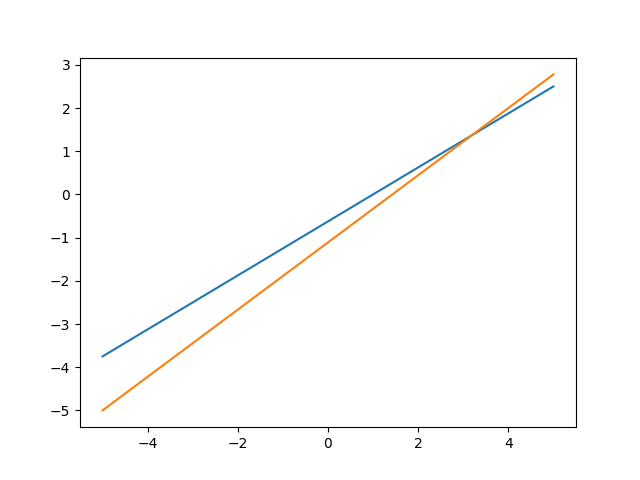

In [89]:
x=np.linspace(-5,5.)
y1=np.linspace(-5.,5.)
v1=[-1,-1.6,1]
v2=[.7,.9,-1.]
y1=v1[0]*x/v1[1]+v1[2]/v1[1]
y2=v2[0]*x/v2[1]+v2[2]/v2[1]
plt.plot(x,y1)
plt.plot(x,y2)

In [ ]:
x=np.linspace

In [90]:
np.unique(sigl[1],axis=0)

array([[0, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 1]])

In [22]:
Sig

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0],
       [0,

In [8]:
Cnts

array([  50,  329,  119, 5889,   51, 1521,   40,   70,   20,  834,    5,
        209,  345, 5080,  202, 2344,  190,  603,   35,  751,    6, 2738,
         40,    7, 1020,   39,   18,  238,   29, 4824,   25, 1048,   88,
         30, 6427,   25,  858,  224,    5,   21,  112,  415,   27,  570,
          2, 3480,   34,    2,  761])

<IPython.core.display.Javascript object>


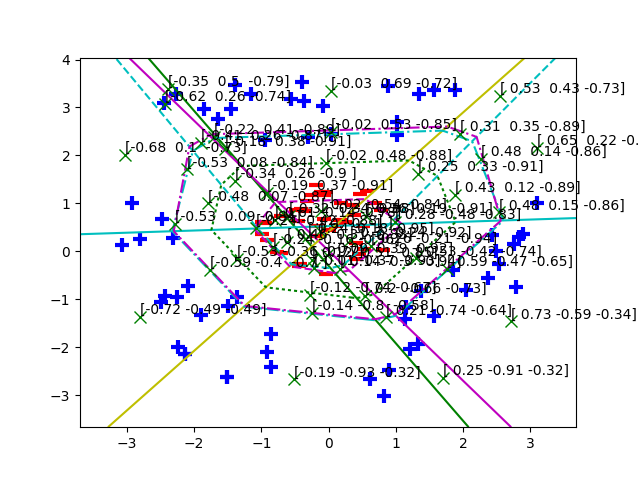

In [9]:
fig,ax=plt.subplots()
gX0,gX1=GridX[:,:,0],GridX[:,:,1]
gX=GridX
P_Layers=get_neuron_values(gX,time_weights)
CT_lists=[]

for l,Layer in enumerate(P_Layers):
    listL=splitL(Layer)
    contour_list=[]
    for i,Pneu in enumerate(listL):
        ctf=ax.contour(gX0,gX1,Pneu,colors=clist[i],levels=[0.],linestyles=listLineStyle[l])
        contour_list.append(ctf)
    CT_lists.append(contour_list)
    
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=100,c='b',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=100,c='r',linewidth='3')

#ix=np.where( Cnts>=1000 )[0]
ix=np.where( Cnts>=1 )[0]
Arr=M2[ix]
Loc=Centers[ix]
str_aff=[np.array2string(s,precision=2) for s in Arr]
loc_str=[c for c in Loc]

#alignment = {'horizontalalignment': 'center'}
alignment = {'horizontalalignment': 'left',
             'verticalalignment':'bottom'}

for txt,loc in zip(str_aff,loc_str):
    ax.text(loc[0],loc[1],txt,**alignment)
    #ax.plot(loc[0],loc[1],style='gx',markersize=120)
    ax.plot(loc[0],loc[1],color='green',marker='x',markersize=8)
plt.savefig(record_dir+'/'+id_str+'_RegionOverlay_AffMaps_CntGT1.pdf')

In [13]:
ix1C=np.where( Cnts>=100 )[0]

In [14]:
flat_ix=np.array([2,4,5,8])
M2[flat_ix]

array([[ 0.25838734, -0.20783387, -0.94341988],
       [ 0.58975056, -0.47436589, -0.65358341],
       [ 0.52741459, -0.42422595, -0.73611561],
       [ 0.14159809, -0.29510448, -0.94491445]])

In [31]:
Cnts[flat_ix]

array([16903,   263,  6099,  6047])

In [33]:
Sig[flat_ix]

array([[1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])

In [35]:
sigl[-1][flat_ix]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [36]:
Centers[flat_ix]

array([[ 1.36164388,  1.08014981],
       [ 0.59591616,  1.13165116],
       [ 0.32725922,  0.98165146],
       [-0.20836186,  0.97865961]])

In [42]:
Sig1C,Centers1C,Cnts1C,M1C=Sig[ix1C],Centers[ix1C],Cnts[ix1C],M2[ix1C]

In [44]:
Cnts1C

array([12978, 16903,   263,  6099,   724,  6047,  3889])

In [45]:
Centers1C

array([[-1.45640421,  0.82414068],
       [ 1.36164388,  1.08014981],
       [ 0.59591616,  1.13165116],
       [ 0.32725922,  0.98165146],
       [-0.84880793,  0.95513563],
       [-0.20836186,  0.97865961],
       [-0.64696074,  0.97621038]])

In [46]:
print np.around(M1C,2)

[[-0.77 -0.06  0.64]
 [ 0.    0.   -1.  ]
 [ 0.    0.   -1.  ]
 [ 0.    0.   -1.  ]
 [-1.   -0.08 -0.02]
 [ 0.    0.   -1.  ]
 [-0.89 -0.07 -0.46]]


In [48]:
Sig1C

array([[0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [49]:
W1f

array([[ 0.78906417, -0.8027047 ,  0.8602567 , -0.80492055],
       [ 0.06518545, -0.06364239,  0.07567172, -0.06530982]],
      dtype=float32)

In [50]:
W2f

array([[-0.8262359 ,  0.91150755,  0.8890051 ,  0.87247336],
       [ 0.73093206, -0.30269304, -0.22747582, -0.28524455],
       [-0.7552978 ,  0.8272015 ,  0.8094798 ,  0.7735411 ],
       [ 0.7562429 , -0.29802728, -0.36970505, -0.2953179 ]],
      dtype=float32)

In [51]:
b2f

array([0.5731294, 0.5918197, 0.5888418, 0.5738835], dtype=float32)

### Look at layer 2 maps

In [78]:
#new_weights=rescale_weights(time_weights,sigl)
Linear2R,Bias2R=compose_affine(new_weights[:2])
Linear2,Bias2=compose_affine([new_weights[0],time_weights[1]])
Maps2=np.concatenate([Linear2,np.expand_dims(Bias2,-2)],axis=-2)#idx,xdim+1,1
Maps2R=np.concatenate([Linear2R,np.expand_dims(Bias2R,-2)],axis=-2)#idx,xdim+1,1
#cnt_thresh=np.percentile(Cnts,20)
#ix_thresh=np.where( Cnts>=cnt_thresh )[0]
ix10C=np.where( Cnts>=1000 )[0]
#M2=M/np.linalg.norm(M,ord=2,axis=(-2,-1),keepdims=True)
#M2=np.squeeze(M2)
Sig_ix,Centers_ix,Cnts_ix,Maps2_ix=Sig[ix10C],Centers[ix10C],Cnts[ix10C],Maps2[ix10C]
Maps2R_ix=Maps2R[ix10C]

In [79]:
Maps2R_ix

array([[[-1.19543802,  0.        ,  0.        ,  0.        ],
        [-0.09590835,  0.        ,  0.        ,  0.        ],
        [ 1.39387577,  0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  1.43084354,  1.39784247,  1.35388135],
        [ 0.        ,  0.12201279,  0.11920492,  0.11540775],
        [ 0.        ,  1.74105294,  1.71157086,  1.66128947]],

       [[ 0.        ,  1.91370495,  1.87802157,  1.82055593],
        [ 0.        ,  0.160741  ,  0.1578274 ,  0.15284856],
        [ 0.        ,  1.40940907,  1.38303139,  1.34088852]],

       [[-2.49714111,  1.91370495,  1.87802157,  1.82055593],
        [-0.20692159,  0.160741  ,  0.1578274 ,  0.15284856],
        [ 0.34836262,  1.40940907,  1.38303139,  1.34088852]],

       [[-2.49714111,  1.91370495,  1.87802157,  1.82055593],
        [-0.20692159,  0.160741  ,  0.1578274 ,  0.15284856],
        [ 0.34836262,  1.40940907,  1.38303139,  1.34088852]]])

In [80]:
Maps2_ix

array([[[-1.19543802,  0.4828614 ,  0.4801791 ,  0.46667458],
        [-0.09590835,  0.03872822,  0.03862248,  0.0374408 ],
        [ 1.39387577,  0.26017583,  0.26030233,  0.25348252]],

       [[-1.30170309,  1.43084354,  1.39784247,  1.35388135],
        [-0.11101324,  0.12201279,  0.11920492,  0.11540775],
        [-0.47238374,  1.74105294,  1.71157086,  1.66128947]],

       [[-2.49714111,  1.91370495,  1.87802157,  1.82055593],
        [-0.20692159,  0.160741  ,  0.1578274 ,  0.15284856],
        [ 0.34836262,  1.40940907,  1.38303139,  1.34088852]],

       [[-2.49714111,  1.91370495,  1.87802157,  1.82055593],
        [-0.20692159,  0.160741  ,  0.1578274 ,  0.15284856],
        [ 0.34836262,  1.40940907,  1.38303139,  1.34088852]],

       [[-2.49714111,  1.91370495,  1.87802157,  1.82055593],
        [-0.20692159,  0.160741  ,  0.1578274 ,  0.15284856],
        [ 0.34836262,  1.40940907,  1.38303139,  1.34088852]]])

In [81]:
W1f,b1f

(array([[ 0.78906417, -0.8027047 ,  0.8602567 , -0.80492055],
        [ 0.06518545, -0.06364239,  0.07567172, -0.06530982]],
       dtype=float32),
 array([0.633153  , 0.5598488 , 0.69162047, 0.54418355], dtype=float32))

In [11]:
W1f/b1f

array([[ 5.3663731e+00,  8.6855426e-02, -9.6940475e+01,  3.0220778e+00],
       [ 3.3197601e+00, -1.8995669e+00, -7.1489822e+01, -2.4308085e+00]],
      dtype=float32)

In [85]:
W2f/b2f

array([[-1.4416219 ,  1.5401778 ,  1.509752  ,  1.520297  ],
       [ 1.2753351 , -0.51146156, -0.38631058, -0.49704263],
       [-1.3178486 ,  1.3977255 ,  1.3746983 ,  1.3479062 ],
       [ 1.3194976 , -0.5035778 , -0.62785125, -0.51459557]],
      dtype=float32)

In [72]:
Maps2[ix10C][0]

array([[-1.19543802,  0.        ,  0.        ,  0.        ],
       [-0.09590835,  0.        ,  0.        ,  0.        ],
       [ 1.39387577,  0.        ,  0.        ,  0.        ]])

In [70]:
Sig[ix10C]

array([[0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [10]:
####Plot the linear maps on each region

fig,ax=plt.subplots()
gX0,gX1=GridX[:,:,0],GridX[:,:,1]
gX=GridX

def draw(time,layer,ax=ax):
    contour_list=[]
    l=layer
    
    delW4=np.reshape(W4[:,:,1]-W4[:,:,0], W4.shape[:2])
    delb4=b4[:,1]-b4[:,0]
    time_weight_list=[[W1[time],b1[time]],
                   [W2[time]   ,b2[time]],
                   [W3[time]   ,b3[time]],
                   [delW4[time],delb4[time]] ]
    
    P_Layers=get_neuron_values(gX,time_weight_list)
    #Precon=sigmoid(P_Layers[-1][:,:,1]-P_Layers[-1][:,:,0])
    
    if len(P_Layers[l].shape)==2:#only one neuron in layer
        listL=[P_Layers[l]]
    else:
        listL=splitL(P_Layers[l])
    
    for i,Pneu in enumerate(listL):
        ctf=ax.contour(gX0,gX1,Pneu,colors=clist[i],levels=[0.],linestyles=listLineStyle[l])
        contour_list.append(ctf)
    return contour_list

CT_lists=[]
for l in range(4):#4 layers
    contour_list=draw(0,l,ax)
    CT_lists.append(contour_list)
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=100,c='b',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=100,c='r',linewidth='3')

plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

plt.tight_layout()


def animate(time):
    global CT_lists
    for contour_list in CT_lists:
        for ctf in contour_list:
            for c in ctf.collections:
                c.remove()
    CT_lists=[]
    for l in range(4):#4 layers
        CT_lists.append(draw(time,l,ax))
    return CT_lists


#anim = animation.FuncAnimation(fig, animate, frames=len(step), repeat=True, interval=10)
del_t=1
anim_deep = animation.FuncAnimation(fig, animate, frames=np.arange(1,len(step),del_t), repeat=True,interval=10)

<IPython.core.display.Javascript object>

IndexError: index 1 is out of bounds for axis 2 with size 1